In [1]:
import pandas as pd, pickle, numpy as np, matplotlib.pyplot as plt, matplotlib.dates as mdates, matplotlib as mpl
import matplotlib.lines as mlines

# A Visual Analysis of the Coronavirus Pandemic

This workbook is a repeatable analysis, using all AWS COVID Data Lake data sources (New York Times, Johns Hopkins, CDC, and Safegraph Census) as well as Google Mobility data.

The data pipeline cleans and aggregates data sources to produce a master table at the county level, which is suitable for independent analysis.

The graphing functions used in this analysis are reusable, and already contain a fair amount of flexibility.

While case counts are included in the data, and in limited capacity in this analysis, non-random testing and testing availability inequities mean intepreting cases can be extremely problematic.  Therefore this analysis focuses on death rates, and is therefore reflection of cases contracted approximately 3-4 weeks before the data refresh date.

## Update Data and Import Graphing Functions

In [2]:
%run create_master_table.ipynb

--------------------
Census Data
--------------------
Enigma Aggregation
Shape:  (236767, 10)
Case control total:  93611696.0
Death control total:  5256694.0
Dataframe Shape:  (236767, 14)
Number of States:  55
Number of Counties:  3003
Minimum Date:  2020-01-21 00:00:00
Maximum Date:  2020-06-14 00:00:00
Duplicate State-Fips-Date:  0
Null State Code:  0
Null County Code:  0
Null Dates:  0
Case Control Total:  93611696.0
Death Control Total:  5256694.0
--------------------
Enigma Johns Hopkins
Shape:  (419379, 14)
Case control total:  62110114.0
Death control total:  3522063.0
Dataframe Shape:  (419379, 18)
Number of States:  51
Number of Counties:  3201
Minimum Date:  2020-01-22 00:00:00
Maximum Date:  2020-05-29 00:00:00
Duplicate State-Fips-Date:  0
Null State Code:  0
Null County Code:  0
Null Dates:  0
Case Control Total:  62110114.0
Death Control Total:  3522063.0
--------------------
Enigma New York Times
Shape:  (129747, 6)
Case control total:  31616769.0
Death control total:  

In [3]:
%run graphFunctions.ipynb

## Section 1: State Totals

### Figure 1.1: Total Deaths by State

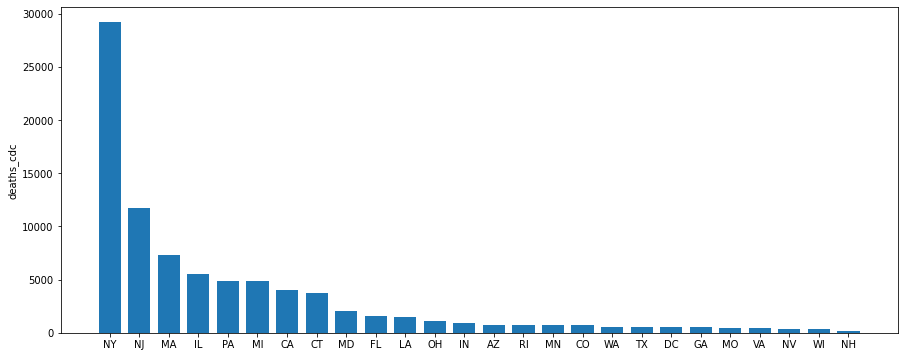

In [4]:
plotStateTotals(data, 'deaths_cdc', 'deaths_cdc', 200)
# The parameters of this function allow the user to change the data source, and the minimum number of deaths

* New York State appears significantly worse then the rest of the country, but it is important to understand that NY also has a lot more people then some areas. 

### Figure 1.2: Total Deaths per 100,000 People by State

The next set of graphs divides the total death count by the number of people in the state.  This give a more fair comparison of each area, and the relative heights of each bar are proportional to the 'probability of death' in each state (equal to 100,000 * the probability of death).

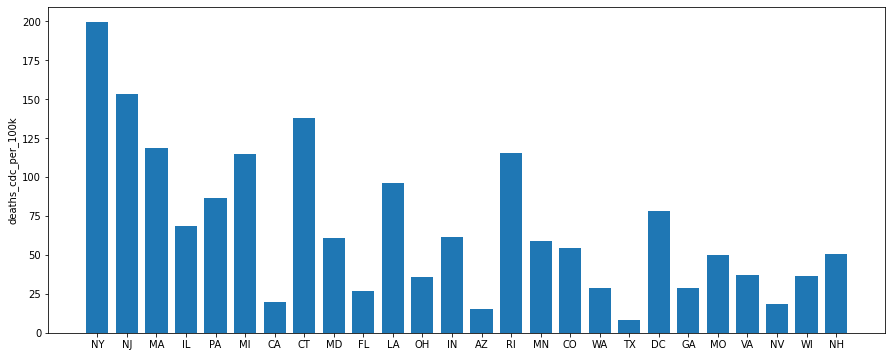

In [5]:
plotStateTotals(data, 'deaths_cdc', 'deaths_cdc_per_100k', 200)

As indicated by Figure 1.2, it is very important to control for the number of people in each area in order to understand the severity of disease.  While the heights are more comparable after controling for state-wide population, what could be causing their differences?  

Possible candidates include:
* More localized differences in the number of people in each area.  The same problem with Figure 1.1 is present in Figure 1.2, as there is not a uniform distribution of people across each state.  There are significantly more people in NYC as compared to ouside of the city, for example, which the visual implicitly assumes is not true.
* The stage of the infection can be very different in each area, in other words, after controlling for population size the only difference is time.   If true, Figure 1.2 would eventually show similar height bars for each state as the ultimate 'probability' of death would not be different based on location.
* Other key drivers to be explored in this analysis

## Section 2: State Comparisons

Key questions to ask when looking at graphs in this section:
* Top left: How much of the relative height differences is due to population differences?  More deaths in areas where there more people is not more severe.
* Bottom left: Here we control for number of people, but how high will the probability of death climb?  Will all areas ultimately reach the same height?  Is it only a matter of time? If not, then what causes the differences?
* Top right: Same issue as top left
* Bottom right: What impacts the intensity of the infection?  Is the same overall probability simply made less intense when it is spread over more time?

### Figure 2.1: Compare Highest Death Rate States (Rank 1-5)

The graphs on the left show the growth in total deaths over time in each state, while the graphs on the right hand side show the average daily death counts.  
* The ultimate height of the top left graph is comparable to the Figure 1.1, while the same is true for the bottom left graph and Figure 1.2.
* The graphs on the right are more a measure of intensity with respect to time.  They measure how hard and fast the diseas hit each area.

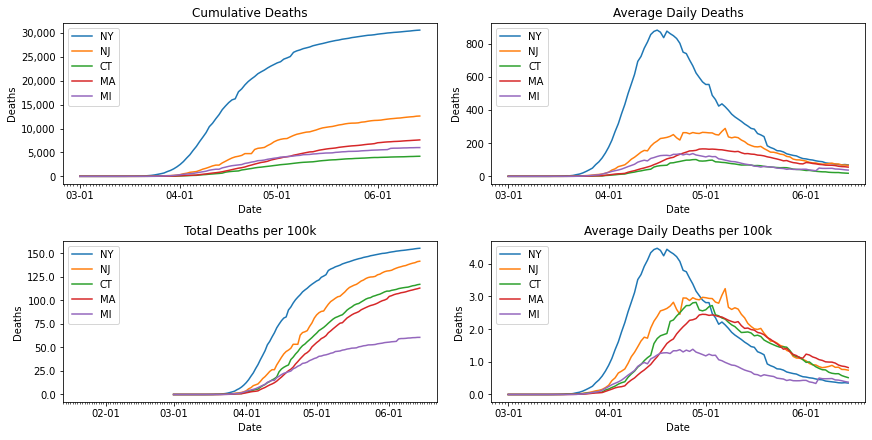

In [6]:
states = ['NY','NJ','CT','MA','MI']
statesCompare(data, states, 'confirmed_cdc', 'deaths_cdc', '2020-03-01', 14)
# Parameters of this function allow the user to change the sates selected, the start date shown,
# and the number of days used in the rolling average smoothing on the graphs to the right.

New Jersey and New York look much more similar after controling for the number of people in each state, but there are clear differences in the intensity level for the areas shown.  It can be hyothesized that social distancing measures are one contributor to reduced intensities, but there could also be other factors more innate to each area.
* Note the death rates are between 50-150 per 100k people.

Bugs:
* Note the difference in ultimate hights for Figure 2.1 (Total Deaths per 100k, bottom left) as compared to 1.2.
* Start date of bottom left graph.

### Figure 2.2: Mobility Reduction for Highest Death Rates (Rank 1-5)

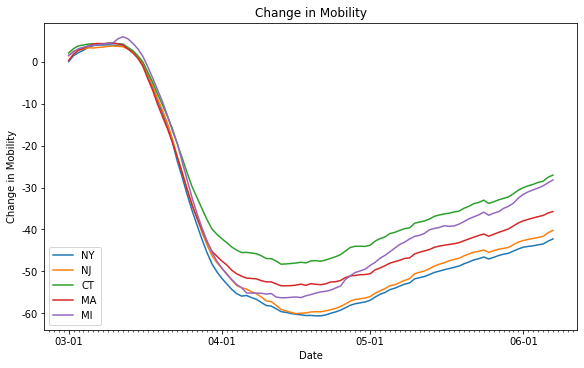

In [7]:
graphMobility(data, states, '2020-03-01', 14)

Comparing Figures 2.1 and 2.2, it is clear that the daily death rates started to fall about 2 weeks after social distancing was widley adopted.

Since social distancing was put in place largley at a similar time in these states, with all states achieving significantly reduced mobility, it is difficult to use differences in mobility reduction to explain differences in the death rates by area.
* NY and NJ have the highest reduction in mobility and the highest deaths (reactive social distancing)
* CT is third in death rate, and had the lowest reduction in mobility (correlation or coinsidence?)

### Figure 2.3: Compare States with Lower Death Rates

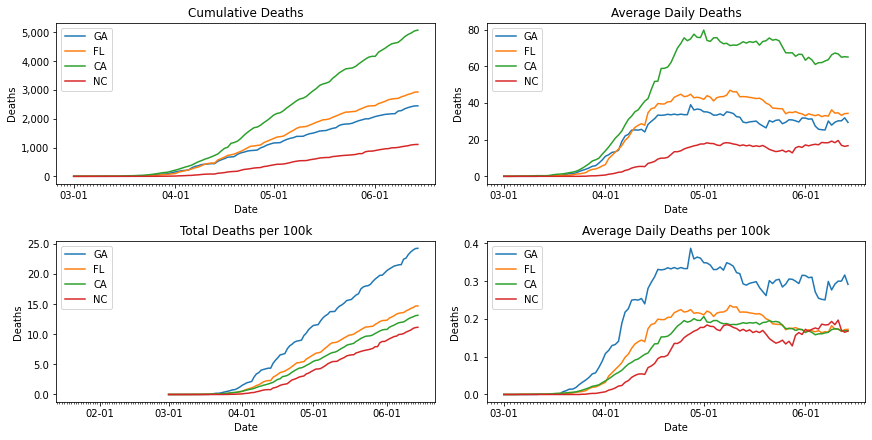

In [8]:
states = ['GA','FL','CA','NC']
statesCompare(data, states, 'confirmed_cdc', 'deaths_cdc', '2020-03-01', 14)
# Parameters of this function allow the user to change the sates selected, the start date shown,
# and the number of days used in the rolling average smoothing on the graphs to the right.

It is important to note the scale differences between figures 2.1 and 2.3.  The death rates here are 10-25 deaths per 100k people (as compared to the order of magnitude higher rates of 50-150 in Figure 2.1.)

The infection appears to be significantly less severe in these states.
* We are controlling for population, so it is just a matter of time, or are there real differences?

### Figure 2.4: Mobility Reduction in Lower Death Rate States

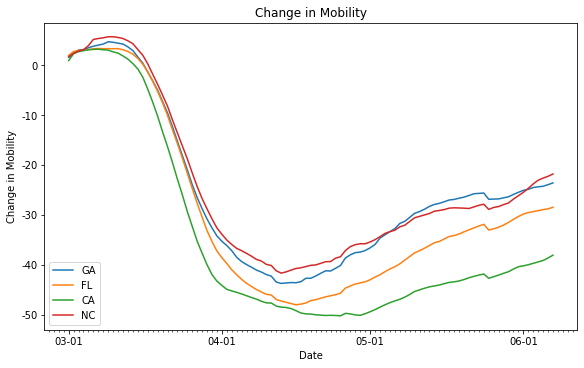

In [9]:
graphMobility(data, states, '2020-03-01', 14)

Mobility reduction is also lower in lower death rate states.  While the average daily deaths shown in Figure 2.3 are generally noisier, the same fattening can be seen, and social distancing appears to have had a similar effect as in more severley effected states.

* Note that google mobility data is more out of date than death count information.

## Section 3: Single States

### Figure 3.1: New York Cases and Deaths

Cases are shown on the left y-axis, and deaths are shown on the right y-axis in each graph.

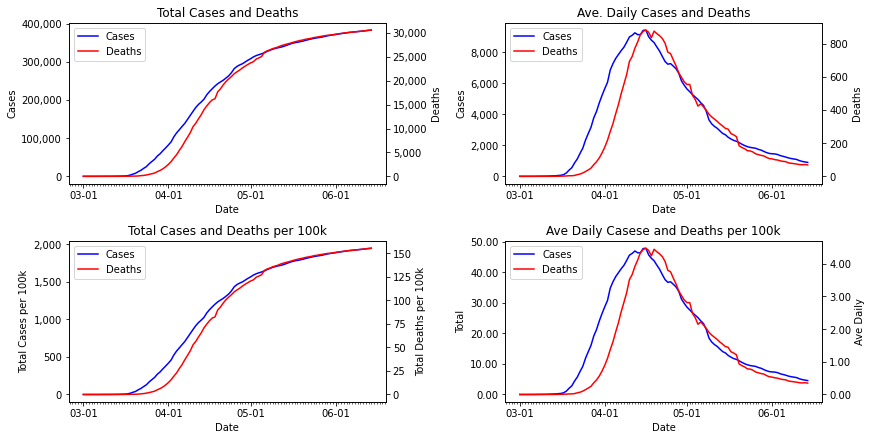

In [10]:
stateGraphs(data, ['NY'],'confirmed_cdc','deaths_cdc', '2020-03-01', 14)
# Parameter allows the user to provide a single or list of states, the coluns used, start date, 
# and time period for rolling average.

### Figure 3.2: New York Death Rates by County

Since New York has the most deaths, it is an important state to understand at a more detailed level.  The graph below shows couny specific death rates over time for any county with over 100 deaths.

We have already stated that state-wide death rates are flawed becuase the population is not uniformly distributed across the state.  Looking deeper at the county level is critical.

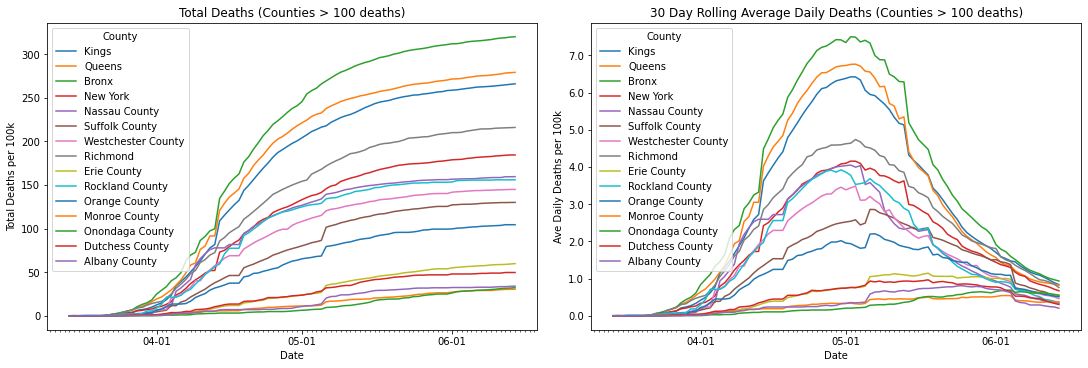

In [11]:
plotCountyDeathCurves(data, state='NY', death_min = 100, rolling_ave = 30, start_date='2020-03-14')
# Parameters allow the user to select a single state, death minimum, start date, and rolling average period

There is a huge range of death rates within New York itself
* NYC counties are impacted almost twice as hard as the statewide average
* Other counties show death rates consistent with completely different and less severely impact areas of the country.  

What explains the differences?
* Time could still play a role as more rural areas may simply have less intensity as the same risk spread over more time.
* A few of the other possible indicators are shown later (population density, uninsured rates)

### Figure 3.3: Georgia Cases and Deaths

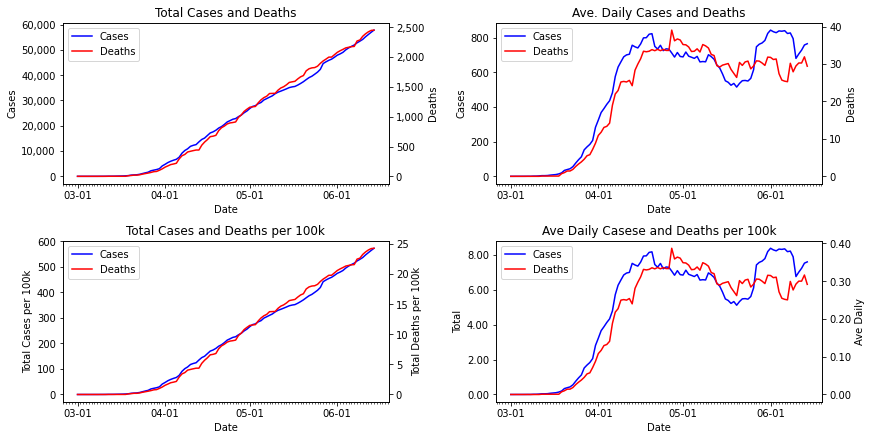

In [12]:
stateGraphs(data, ['GA'],'confirmed_cdc','deaths_cdc', '2020-03-01', 14)

The number of daily cases can be seen flattening, and then increasing.  This could be related to the increase in mobility shown in Figure 2.4, but cases can largley not be trusted as testing is not random.

The death rate has not yet increased. 

* One possibility to keep in mind is that mobility changes need to be understood in the context of population density.

### Figure 3.4: Georgia Death Rates by County

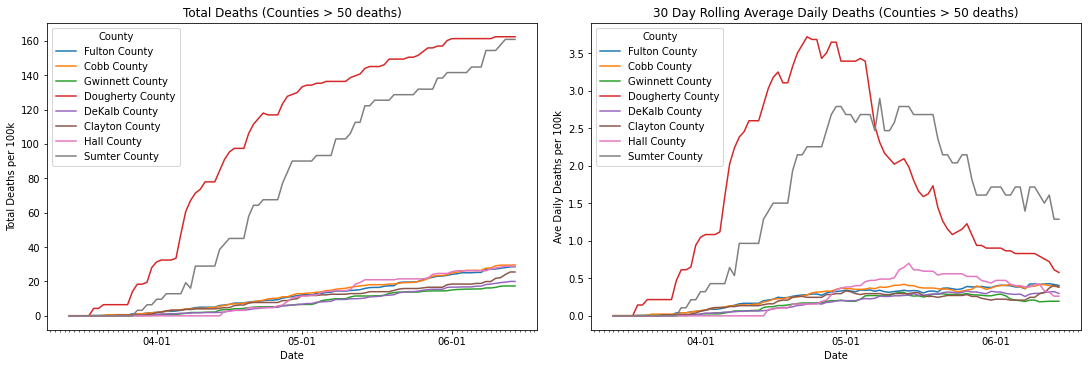

In [13]:
plotCountyDeathCurves(data, state='GA', death_min = 50, rolling_ave = 30, start_date='2020-03-14')

* Dougherty County has death rates in line with some NY counties, while most other death rates remain low.  The article below explains how two funerals contributeds to the spread here.
* https://www.cnn.com/2020/04/02/us/albany-georgia-coronavirus/index.html
* Sumter County has also quickly risen.

## Section 4: Univariate Analysis of County Death Rates

A highly speculative statement ensues.  The prior sections could be viewed in a way that support that while time is the obvious contributor for huge differences in death rates (most may eventually rise to between 50-300 deaths per 100k), other factors determine if the death rate will ultimately be on the upper or lower end of that spectrum.

The purpose of this section is to investigate these other factors.

We limit this section to the states with the highest death rates overall.  Each graph groups counties into 'Low' or 'High' categories with regard to the factor indicated.

The overall trends shown in each graph tend to be true in each individual state, as well as the collection of states shown.
* Population density, race, access to healthcare (measured by uninsured rate), and income (measured by PIR) are all significantly correlated with death rates.
* Age is less correlated with death rates, but results are unintuitive: the youngest counties have the highest death rates.

### Figure 4.1: Population Density

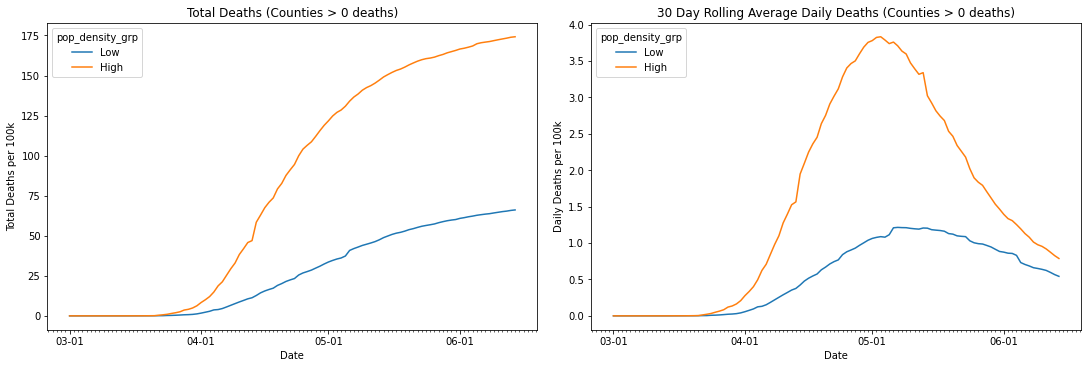

In [14]:
states = ['NY','NJ','CT','MA','MI']
plotGroupedDeathCurves(data, states=states, rolling_ave=30, bycol='pop_density_grp', start_date='2020-03-01')
# Parameters allow a grouping variable to be selected, states to be defined, as well as start date and rolling average parameters
# Already included groupings are:
# pir_grp
# unins_grp
# pop_density_grp
# e_grp
# r_b_grp
# r_w_grp
# age_55_plus_grp

### Figure 4.2: Race

The race definition used here is 'white' as reported in census data.  Low would be 'non-white' and high would be 'white'.

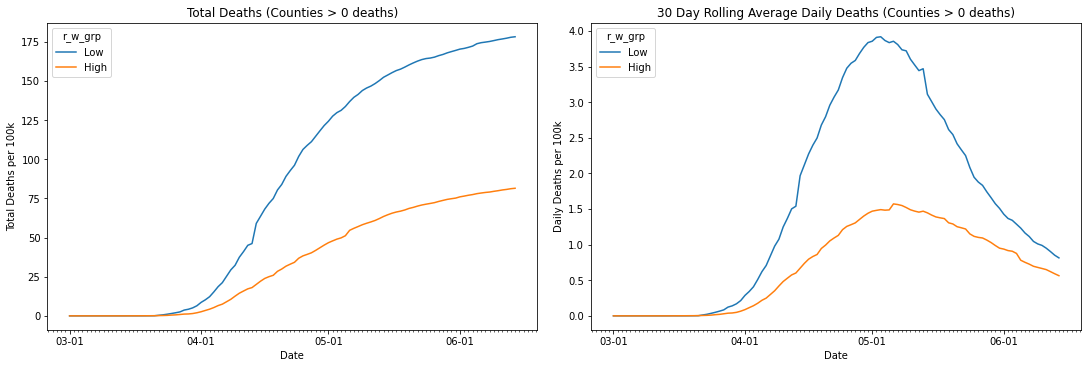

In [15]:
states = ['NY','NJ','CT','MA','MI']
plotGroupedDeathCurves(data, states=states, rolling_ave=30, bycol='r_w_grp', start_date='2020-03-01')

### Figure 4.2: Uninsured

'Low' are the counties with the lowest percentages of uninsured individuals.

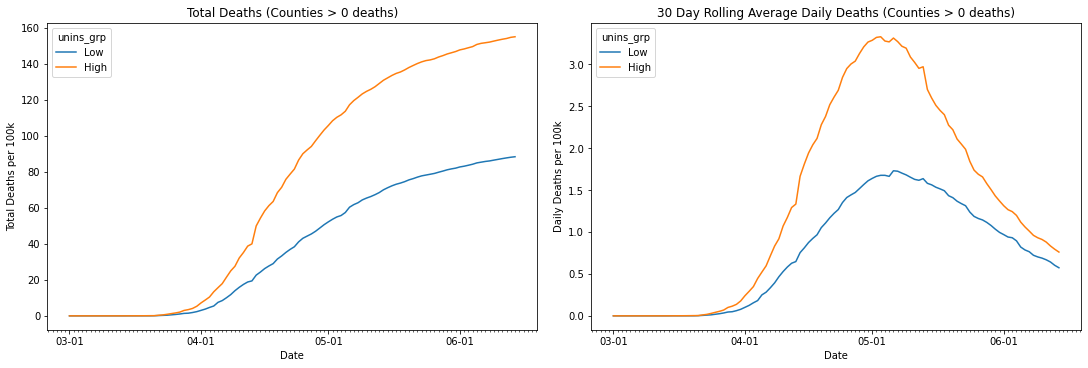

In [16]:
states = ['NY','NJ','CT','MA','MI']
plotGroupedDeathCurves(data, states=states, rolling_ave=30, bycol='unins_grp', start_date='2020-03-01')

### Figure 4.3: Poverty Income Ratio

'High' are the counties with the highest percentage of PIR > 200%

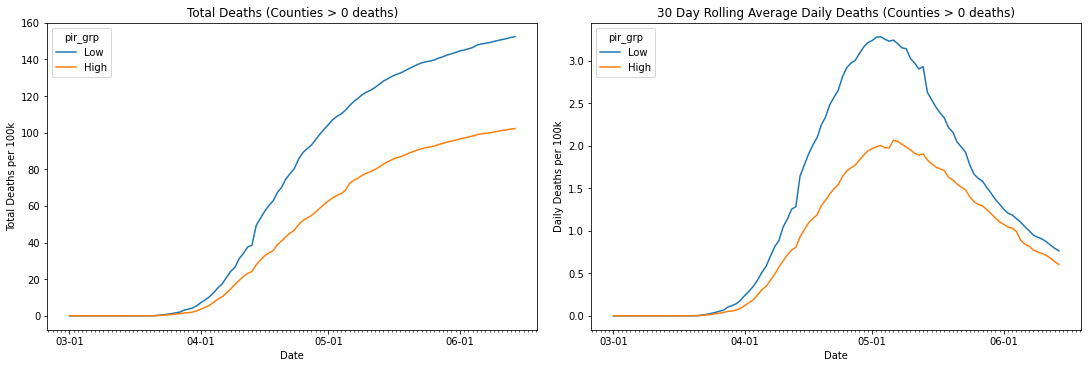

In [17]:
states = ['NY','NJ','CT','MA','MI']
plotGroupedDeathCurves(data, states=states, rolling_ave=30, bycol='pir_grp', start_date='2020-03-01')

### Figure 4.4: Age in NY and NJ

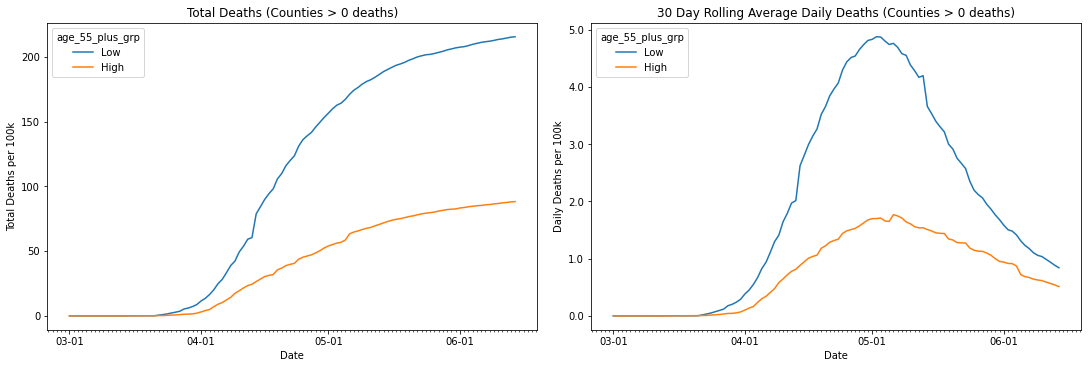

In [18]:
states = ['NY','NJ']
plotGroupedDeathCurves(data, states=states, rolling_ave=30, bycol='age_55_plus_grp', start_date='2020-03-01')

It should be noted that the graphs do not imply that more young people die.  They simply imply that in counties with the largest proportion of people under the age of 55 have higher death rates.

### Figure 4.5: Age in CT, MA, MI

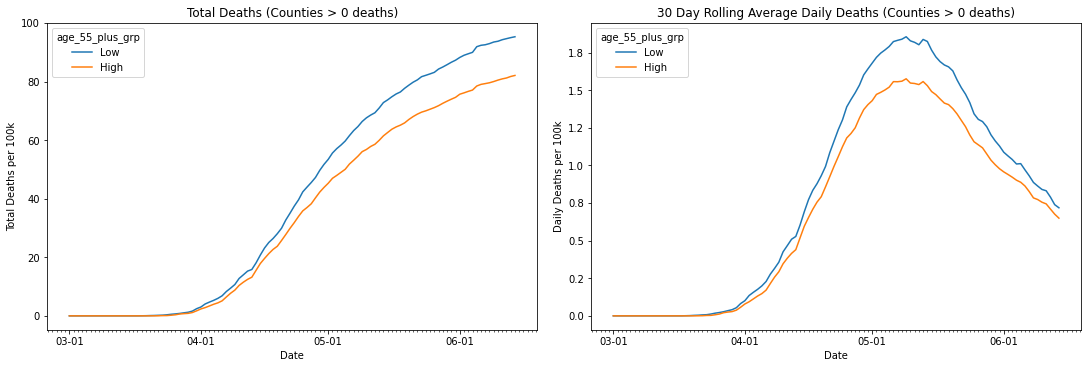

In [19]:
states = ['CT','MA', 'MI']
plotGroupedDeathCurves(data, states=states, rolling_ave=30, bycol='age_55_plus_grp', start_date='2020-03-01')

The age effect is much less pronounced outside NY and NJ. 
 * The oddity of Figures 4.4 and 4.5 are worth a closer look in the next section.

## Section 5: Multivariate Analysis

The graphs in this section come in groups of four.
* Top left and right graphs show the death rates on the y-axis, and two variables of interest on each x-axis.  The color is time, with yellow being the most recent; in this way you can see each vertical line growing over time.
* Bottom left shows each variable of interest on the x and y-axis, and the color is the current (most recent time) death rate (dark is highest)
* Bottom right shows the prior three graphs simultanously in 3 dimensions.  Each of the prior three graphs can be thought of as a projection of this cube.  This graph is usefull to try to control for each of the varabiles of interest (do they work together, or explain the same thing two different ways).

### Figure 5.1: Population Density and Age

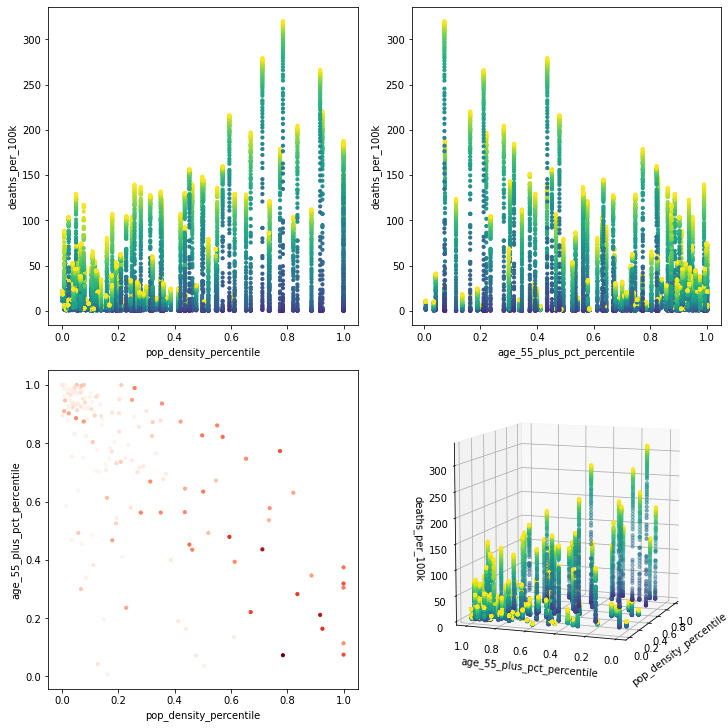

In [20]:
states = ['NY','NJ','CT','MA','MI']
plotInteractions(data, 'pop_density_percentile', 'age_55_plus_pct_percentile', 'deaths_per_100k',states)

* The same population density and age effects from section 4 can be seen in the top graphs
* For areas where the most recent (yellow) dot is lower than similar areas, is the main different only time or the stage of the diseas spread?
* The bottom left graph indicates the highest death rates are in youngest and most dense counties.  Why the youngest?


### Figure 5.2: Population Density and Race

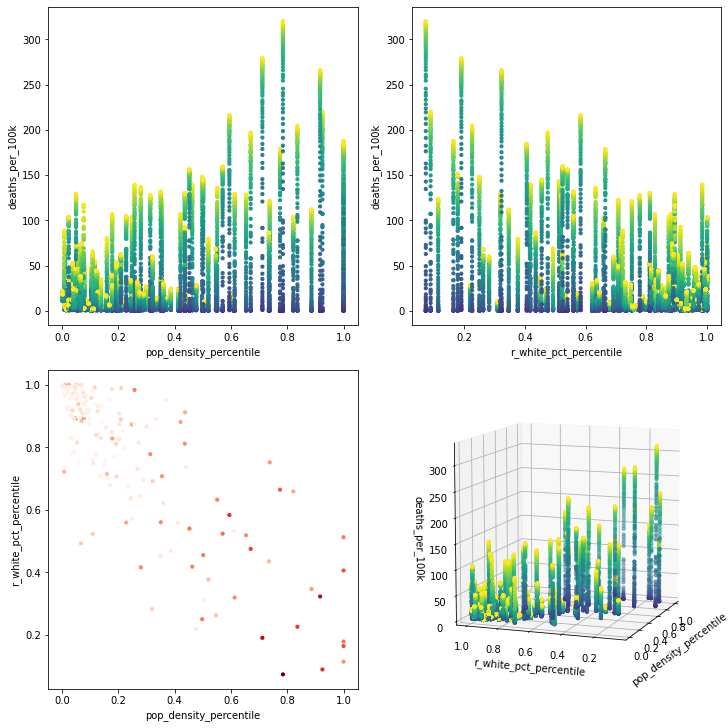

In [21]:
plotInteractions(data, 'pop_density_percentile', 'r_white_pct_percentile', 'deaths_per_100k',states)

* The highest death rates are seen in the most dense, and most non-white counties.

### Figure 5.3: Age and Race

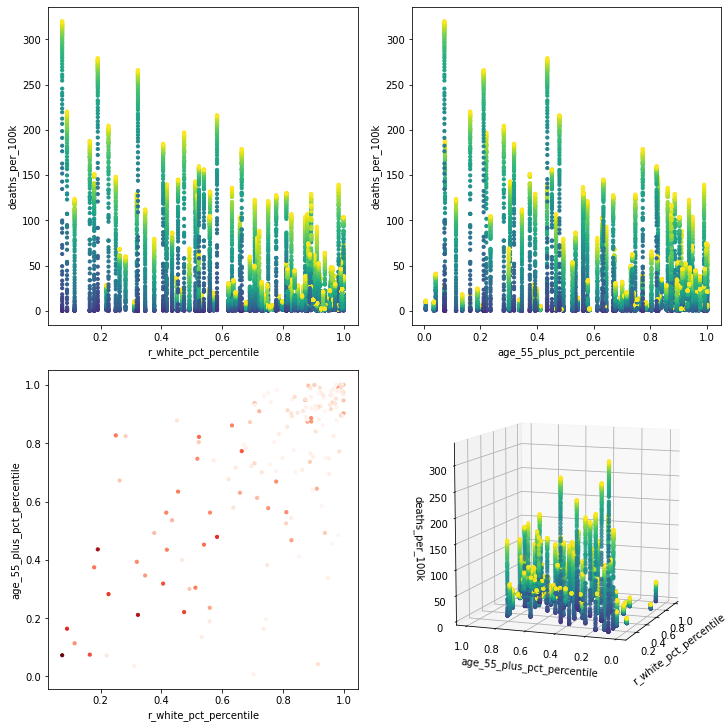

In [22]:
plotInteractions(data, 'r_white_pct_percentile', 'age_55_plus_pct_percentile', 'deaths_per_100k',states)

* Highest death rates seen in the oldest and most white, and the youngest and most non-white counties

### Figure 5.4: Population Density and Race

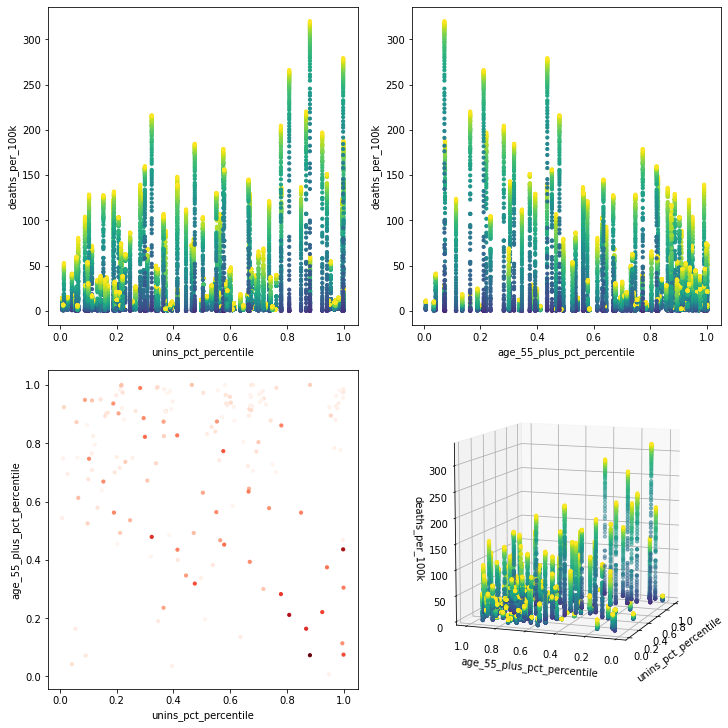

In [23]:
plotInteractions(data, 'unins_pct_percentile', 'age_55_plus_pct_percentile', 'deaths_per_100k',states)

* Highest death rates seen in younger counties for most uninsured areas
* Highest death reates seen in older counties for least uninsured areas

### Figure 5.5: Race and Uninsured

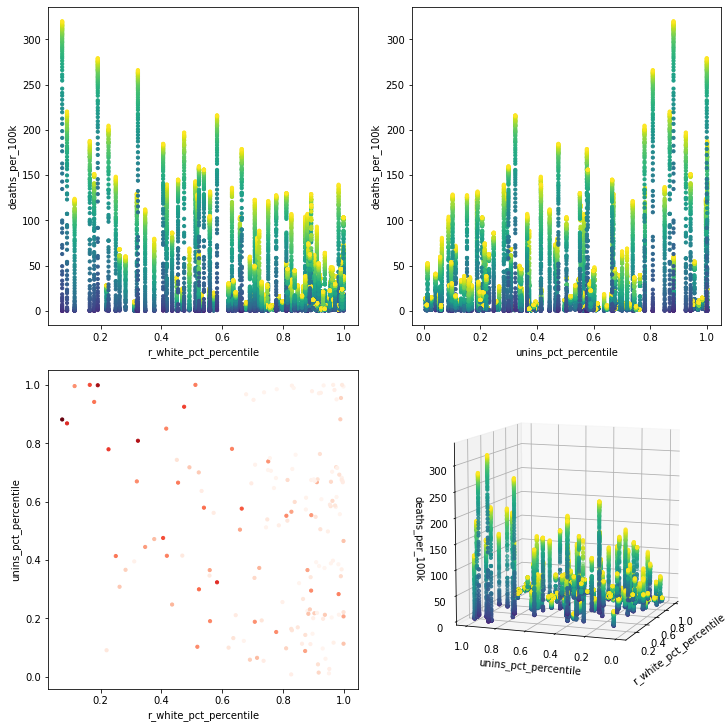

In [24]:
plotInteractions(data, 'r_white_pct_percentile', 'unins_pct_percentile', 'deaths_per_100k',states)

* For the most non-white counties, the highest death rates are seen in the most uninsured areas
* For the most white counties, death rates are similar across uninsured percentiles